Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8759 - loss: 0.4321
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9632 - loss: 0.1253
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9760 - loss: 0.0797
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9826 - loss: 0.0579
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9875 - loss: 0.0419
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9743 - loss: 0.0851

Original model accuracy: 0.9778000116348267
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Epoch 1/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6721 - loss: 1.1354
Epoch 2/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9258 - loss: 0.2641
Epoch 3/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9553 - loss: 0.1560
Epoch 4/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9679 - loss: 0.1285
Epoch 5/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy

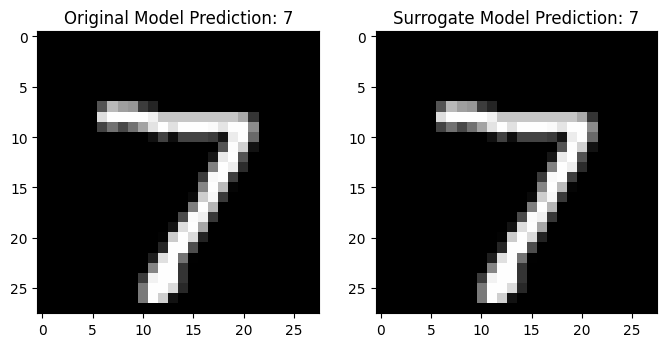

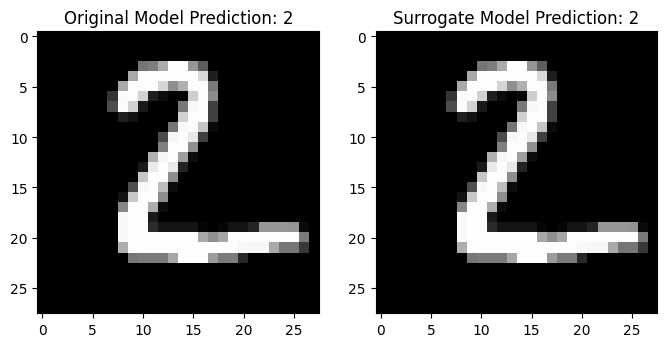

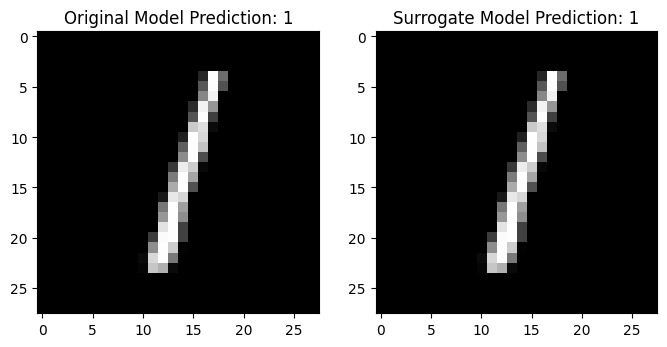

In [2]:
# Step 1: Import necessary libraries
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Step 2: Load the MNIST dataset
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Normalize images to the range [0, 1]
train_images = train_images / 255.0
test_images = test_images / 255.0

# Step 3: Build the original (target) neural network model
original_model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Step 4: Compile the original model
original_model.compile(optimizer='adam',
                       loss='sparse_categorical_crossentropy',
                       metrics=['accuracy'])

# Step 5: Train the original model
original_model.fit(train_images, train_labels, epochs=5)

# Step 6: Evaluate the original model on test data
test_loss, test_acc = original_model.evaluate(test_images, test_labels)
print(f'\nOriginal model accuracy: {test_acc}')

# Step 7: Simulate an attacker querying the original model
# The attacker does not know the model's structure, but can query it with input data and get predictions

# Simulate querying the original model to get predictions
def query_original_model(data):
    return np.argmax(original_model.predict(data), axis=1)

# The attacker collects a subset of test images and queries the original model
num_queries = 5000
query_indices = np.random.choice(len(test_images), num_queries)
queried_images = test_images[query_indices]
queried_labels = query_original_model(queried_images)  # Attacker gets the labels by querying the original model

# Step 8: The attacker now builds a surrogate model based on the data they queried
surrogate_model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Step 9: Compile the surrogate model
surrogate_model.compile(optimizer='adam',
                        loss='sparse_categorical_crossentropy',
                        metrics=['accuracy'])

# Step 10: Train the surrogate model using the data obtained from querying the original model
surrogate_model.fit(queried_images, queried_labels, epochs=5)

# Step 11: Evaluate the surrogate model on test data
surrogate_loss, surrogate_acc = surrogate_model.evaluate(test_images, test_labels)
print(f'\nSurrogate model accuracy: {surrogate_acc}')

# Step 12: Compare performance of the original and surrogate models
original_predictions = original_model.predict(test_images)
surrogate_predictions = surrogate_model.predict(test_images)

# Visualize some predictions
def plot_predictions(index):
    plt.figure(figsize=(8, 4))

    # Original Model Prediction
    plt.subplot(1, 2, 1)
    plt.title(f'Original Model Prediction: {np.argmax(original_predictions[index])}')
    plt.imshow(test_images[index], cmap='gray')

    # Surrogate Model Prediction
    plt.subplot(1, 2, 2)
    plt.title(f'Surrogate Model Prediction: {np.argmax(surrogate_predictions[index])}')
    plt.imshow(test_images[index], cmap='gray')

    plt.show()

# Plot predictions for some test samples
for i in range(3):
    plot_predictions(i)
